## Predicting blood glucose levels

In [1]:
import pandas as pd
diabetes_df = pd.read_csv("diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [2]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Creating feature and target arrays

In [3]:
X = diabetes_df.drop("glucose", axis=1).values    # axis=1 means along "columns". It's a column-wise operation.
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Making predictions from a single feature

In [4]:
X_bmi = X[:,4]
print(y.shape, X_bmi.shape)

(768,) (768,)


Our features should be 2 dimensional arrays to be accepted by scikit-learn

In [5]:
X_bmi = X_bmi.reshape(-1,1)

-1 in reshape function is used when you don't know or want to explicitly tell the dimension of the axis.

In [6]:
print(X_bmi.shape)

(768, 1)


### Plotting glucose vs. body mass index

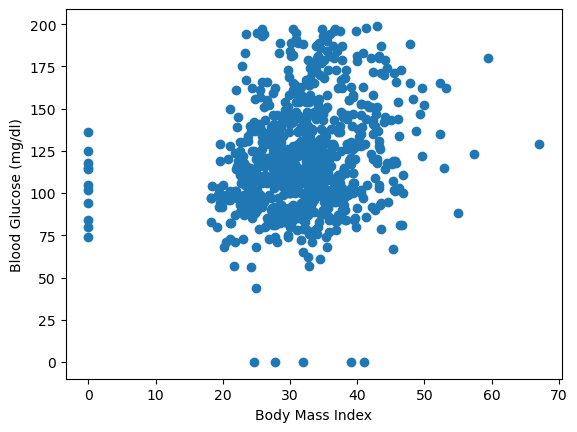

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi,y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Fitting a regression model

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

Here we fit the model to all the feature observations

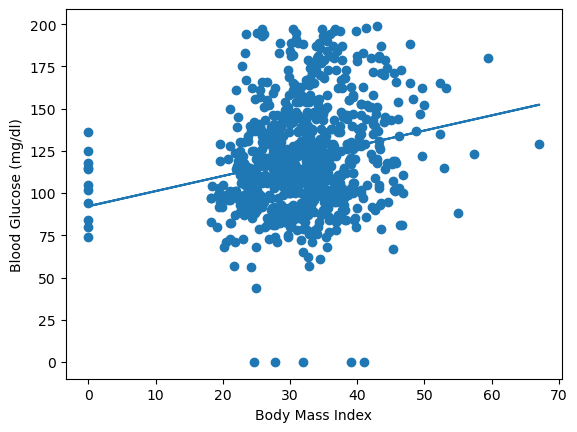

In [9]:
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)  # This gives a line of best fit for our data
plt.scatter(X_bmi,y)
plt.plot(X_bmi,predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

## Creating features

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. 

In [10]:
sales_df = pd.read_csv("advertising_and_sales_clean.csv")

In [11]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [12]:
import numpy as np

In [13]:
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


## Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

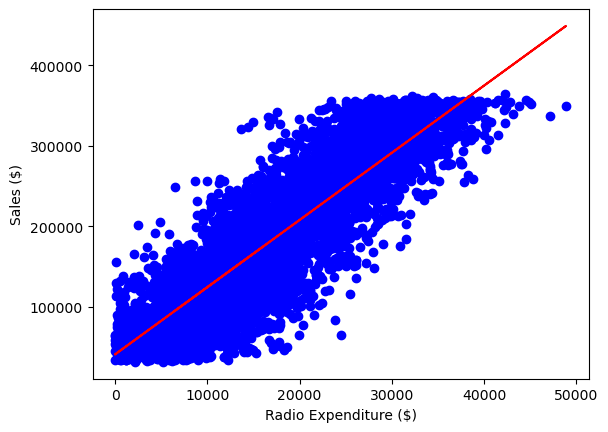

In [16]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### Linear Regression using all features

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

### R-squared in scikit-learn

In [18]:
reg_all.score(X_test, y_test)

0.7609020445216754

### RMSE in scikit_learn

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

45879.42086239429

This returns the square root of the MSE

The model has an average error of Sales of around 45879 dollars

## Fit and predict for Regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset.

Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.

In [20]:
# Create X and y arrays
X = sales_df.drop(["sales", "influencer"],axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X

array([[16000.  ,  6566.23,  2907.98],
       [13000.  ,  9237.76,  2409.57],
       [41000.  , 15886.45,  2913.41],
       ...,
       [44000.  , 19800.07,  5096.19],
       [71000.  , 17534.64,  1940.87],
       [42000.  , 15966.69,  5046.55]])

In [22]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [23]:
# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Regression Performance

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

In [24]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996000956


Wow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

## Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

In [25]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

## Analyzing cross-validation metrics


Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results.

In [26]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


An average score of 0.75 with a low standard deviation is pretty good for a model out of the box

## Regularized regression: Ridge


Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their  scores. You will use all of the features in the sales_df dataset to predict "sales".

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

In [27]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


 The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

## Lasso regression for feature importance


In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

In [28]:
sales_columns = sales_df.drop(["sales", "influencer"],axis=1).columns


[ 3.56256962 -0.00397035  0.00496385]


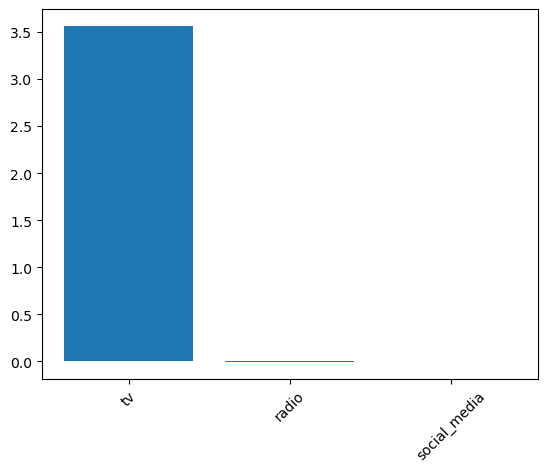

In [29]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!